In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA
import datetime

In [2]:
data = pd.read_csv("TrafficData.csv")

## Report Generation using pandas_profiling

In [3]:
from pandas_profiling import ProfileReport
ProfileReport(data)

In [4]:
data.shape

(1285, 2)

In [5]:
list(data)

['Date', 'Transaction Count']

In [6]:
data.head()

,Date,Transaction Count
0,01-01-2016 00:00,2093576
1,02-01-2016 00:00,2397260
2,03-01-2016 00:00,2173039
3,04-01-2016 00:00,2051240
4,05-01-2016 00:00,1954117


In [7]:
data.tail()

,Date,Transaction Count
1280,04-07-2019 00:00,2174217
1281,05-07-2019 00:00,2530250
1282,06-07-2019 00:00,2510980
1283,07-07-2019 00:00,2032842
1284,08-07-2019 00:00,2291760


In [8]:
data.describe(include="all")

,Date,Transaction Count
count,1285,1.285000e+03
unique,1285,NaN
top,26-09-2017 00:00,NaN
freq,1,NaN
mean,NaN,2.231747e+06
std,NaN,1.245358e+06
min,NaN,1.061345e+06
25%,NaN,1.652568e+06
50%,NaN,1.980385e+06
75%,NaN,2.360693e+06


In [11]:
data.dtypes

Date                 object
Transaction Count     int64
dtype: object

## Adding new variables

### Adding Weekday as field

In [12]:
import datetime 
import calendar 
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d-%m-%Y %H:%M').weekday() 
    return (calendar.day_name[born]) 

In [13]:
days = []
for i in data['Date']:
    days.append(findDay(i))

In [14]:
data['Day'] = days

In [15]:
data.head()

,Date,Transaction Count,Day
0,01-01-2016 00:00,2093576,Friday
1,02-01-2016 00:00,2397260,Saturday
2,03-01-2016 00:00,2173039,Sunday
3,04-01-2016 00:00,2051240,Monday
4,05-01-2016 00:00,1954117,Tuesday


### Date column type conversion from string to datetime

In [16]:
type(data['Date'][0])

str

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y %H:%M")

In [18]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
data.head()

,Date,Transaction Count,Day
0,2016-01-01,2093576,Friday
1,2016-01-02,2397260,Saturday
2,2016-01-03,2173039,Sunday
3,2016-01-04,2051240,Monday
4,2016-01-05,1954117,Tuesday


### Adding Year and Month as fields

In [20]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [21]:
data.head()

,Date,Transaction Count,Day,Year,Month
0,2016-01-01,2093576,Friday,2016,1
1,2016-01-02,2397260,Saturday,2016,1
2,2016-01-03,2173039,Sunday,2016,1
3,2016-01-04,2051240,Monday,2016,1
4,2016-01-05,1954117,Tuesday,2016,1


## Cleaning data

### Removing data of 07-2019

In [22]:
data = data[(data['Year']!=2019) | (data['Month']!=7)]

In [23]:
data

,Date,Transaction Count,Day,Year,Month
0,2016-01-01,2093576,Friday,2016,1
1,2016-01-02,2397260,Saturday,2016,1
2,2016-01-03,2173039,Sunday,2016,1
3,2016-01-04,2051240,Monday,2016,1
4,2016-01-05,1954117,Tuesday,2016,1
...,...,...,...,...,...
1272,2019-06-26,2666876,Wednesday,2019,6
1273,2019-06-27,2655708,Thursday,2019,6
1274,2019-06-28,2889752,Friday,2019,6
1275,2019-06-29,2655321,Saturday,2019,6


## Visualizing

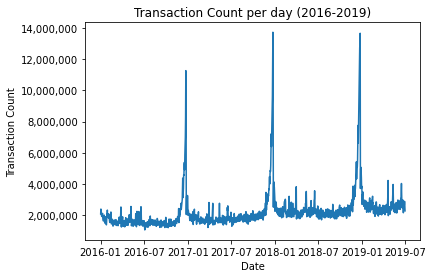

In [24]:
plt.plot(data['Date'], data['Transaction Count'])
plt.title('Transaction Count per day (2016-2019)')
plt.ylabel('Transaction Count')
plt.xlabel('Date')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Grouping data by 'Year'

In [25]:
data2016 = data[data['Year'] == 2016].drop('Year', axis=1)
data2017 = data[data['Year'] == 2017].drop('Year', axis=1)
data2018 = data[data['Year'] == 2018].drop('Year', axis=1)
data2019 = data[data['Year'] == 2019].drop('Year', axis=1)

### Grouping the yearly data by month

In [28]:
data2016Months = data2016.groupby(['Month']).sum()
data2017Months = data2017.groupby(['Month']).sum()
data2018Months = data2018.groupby(['Month']).sum()
data2019Months = data2019.groupby(['Month']).sum()

### Visualizing Transaction Count per Month for each Year

In [29]:
def plotGraphMonth(data, year=-1):
    if(year==-1):
        title = 'Transaction Count per month'
    else:
        title = 'Transaction Count per month for '+ str(year)
    y_pos = np.arange(len(data))
    plt.bar(y_pos, data['Transaction Count'])
    plt.xticks(y_pos, data.index,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Month',fontsize=10)
    plt.ylabel('Number of Transactions',fontsize=10)
    plt.title(title,fontsize=15)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.show()

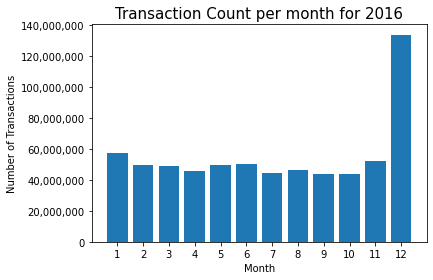

In [107]:
plotGraphMonth(data2016Months, 2016)

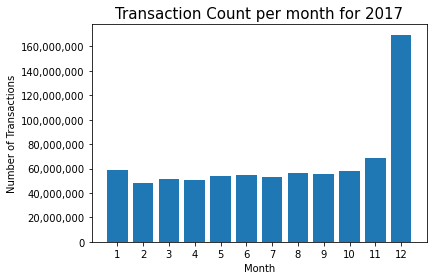

In [30]:
plotGraphMonth(data2017Months, 2017)

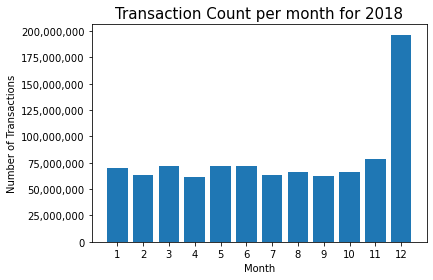

In [31]:
plotGraphMonth(data2018Months, 2018)

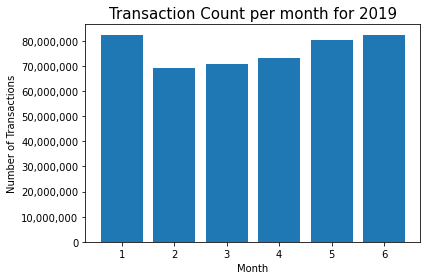

In [32]:
plotGraphMonth(data2019Months, 2019)

### Plotting Transaction Counts per Month (2016-2019)

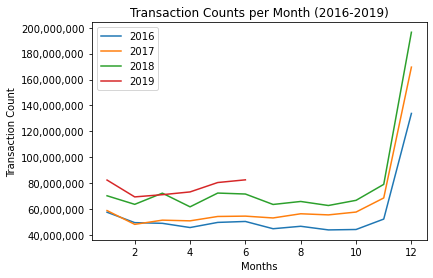

In [108]:
plt.plot(data2016Months.index, data2016Months['Transaction Count'], label = "2016")
plt.plot(data2017Months.index, data2017Months['Transaction Count'], label = "2017")
plt.plot(data2018Months.index, data2018Months['Transaction Count'], label = "2018")
plt.plot(data2019Months.index, data2019Months['Transaction Count'], label = "2019")
plt.legend()
plt.xlabel('Months')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts per Month (2016-2019)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

## Linear Regression

### Linear Regression for 2016
##### Using only date_ordinal variable


In [34]:
data2016trial = data2016

data2016trial['date_ordinal'] = data2016trial['Date'].apply(lambda x: x.toordinal())
data2016trial.head()

X = data2016trial['date_ordinal'].values.reshape(-1,1)
y = data2016trial['Transaction Count'].values.reshape(-1,1)

print(len(y), len(X))


366 366


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1670737,1591210.44
1,1584186,2119759.57
2,1441901,1380481.71
3,2090539,1314844.89
4,1885958,1494482.50
...,...,...
69,1512180,1774302.63
70,1388455,1480664.22
71,2189728,1812302.89
72,1351226,1618847.00


### Plotting Actual v/s Predicted for 2016

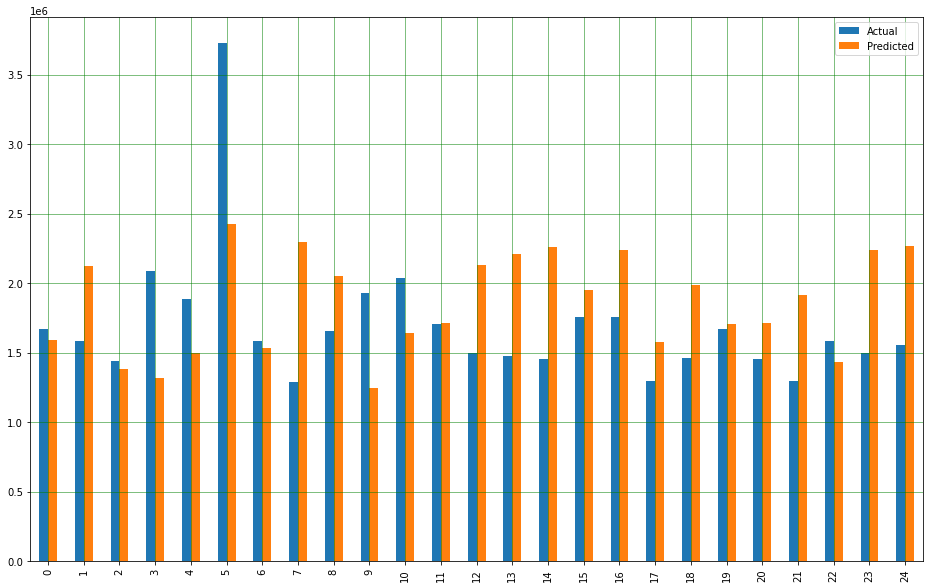

In [37]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

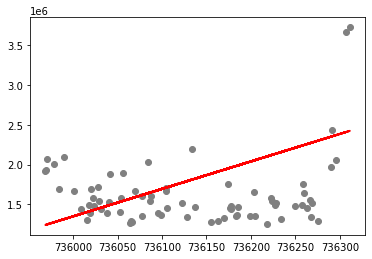

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 432239.570059119
Mean Squared Error: 277971742963.15826
Root Mean Squared Error: 527230.2561150661
r2 score: -0.5430548716814616


### Linear Regression - Trying with different combinations

### Removing December month from each year 

In [40]:
data.head()

,Date,Transaction Count,Day,Year,Month
0,2016-01-01,2093576,Friday,2016,1
1,2016-01-02,2397260,Saturday,2016,1
2,2016-01-03,2173039,Sunday,2016,1
3,2016-01-04,2051240,Monday,2016,1
4,2016-01-05,1954117,Tuesday,2016,1


In [41]:
datawoDec = data[data['Month'] < 12]

In [42]:
datawoDec.tail()

,Date,Transaction Count,Day,Year,Month
1272,2019-06-26,2666876,Wednesday,2019,6
1273,2019-06-27,2655708,Thursday,2019,6
1274,2019-06-28,2889752,Friday,2019,6
1275,2019-06-29,2655321,Saturday,2019,6
1276,2019-06-30,2279690,Sunday,2019,6


In [109]:
datawoDec['date_ordinal'] = datawoDec['Date'].apply(lambda x: x.toordinal())
datawoDec.head()

X = datawoDec['date_ordinal'].values.reshape(-1,1)
y = datawoDec['Transaction Count'].values.reshape(-1,1)

C:\Users\18abh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
X

array([[735964],
       [735965],
       [735966],
       ...,
       [737238],
       [737239],
       [737240]], dtype=int64)

In [46]:
y

array([[2093576],
       [2397260],
       [2173039],
       ...,
       [2889752],
       [2655321],
       [2279690]], dtype=int64)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2096651,2203050.20
1,1619567,1953539.58
2,2190886,2321611.99
3,1887941,2294183.52
4,2387119,1772157.74
...,...,...
232,2004183,2036709.78
233,1822514,1871254.16
234,2418140,2430441.09
235,2396021,2030516.26


### Plotting Actual v/s Predicted across all years excluding December

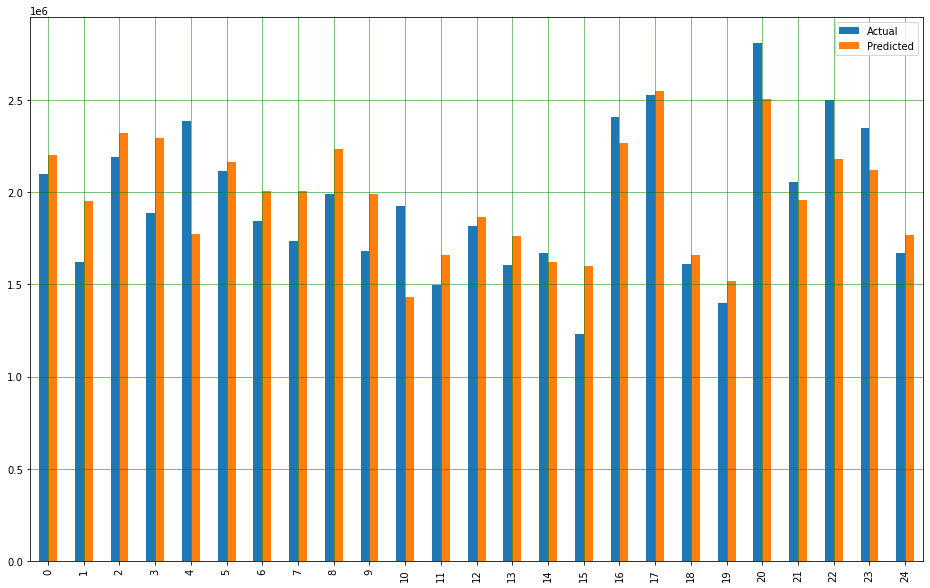

In [49]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

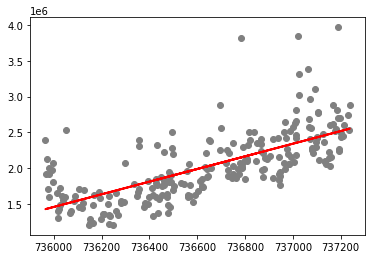

In [50]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 252303.58339917206
Mean Squared Error: 119505266155.49693
Root Mean Squared Error: 345695.3371908521
r2 score: 0.49364475346106307


### Turning the string values to numeric

In [52]:
d = {'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5 ,'Saturday':6, 'Sunday': 7}

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1277 non-null   datetime64[ns]
 1   Transaction Count  1277 non-null   int64         
 2   Day                1277 non-null   object        
 3   Year               1277 non-null   int64         
 4   Month              1277 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 59.9+ KB


In [54]:
data['Day'].replace(d, inplace=True)

C:\Users\18abh\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [55]:
data.head()

,Date,Transaction Count,Day,Year,Month
0,2016-01-01,2093576,5,2016,1
1,2016-01-02,2397260,6,2016,1
2,2016-01-03,2173039,7,2016,1
3,2016-01-04,2051240,1,2016,1
4,2016-01-05,1954117,2,2016,1


In [57]:
data['date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

C:\Users\18abh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
data.head()

,Date,Transaction Count,Day,Year,Month,date_ordinal
0,2016-01-01,2093576,5,2016,1,735964
1,2016-01-02,2397260,6,2016,1,735965
2,2016-01-03,2173039,7,2016,1,735966
3,2016-01-04,2051240,1,2016,1,735967
4,2016-01-05,1954117,2,2016,1,735968


### Multiple Linear Regression

In [59]:
X = data[['date_ordinal','Year','Month','Day']].values
y = data['Transaction Count'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2527256,2897906.44
1,1918102,2630833.61
2,2202130,2065253.57
3,2693643,2789923.79
4,1362162,2190534.30
...,...,...
251,2468536,2577023.29
252,1697756,2570145.88
253,3312578,3377985.78
254,2096730,2383911.67


### Plotting Actual v/s Predicted across all years

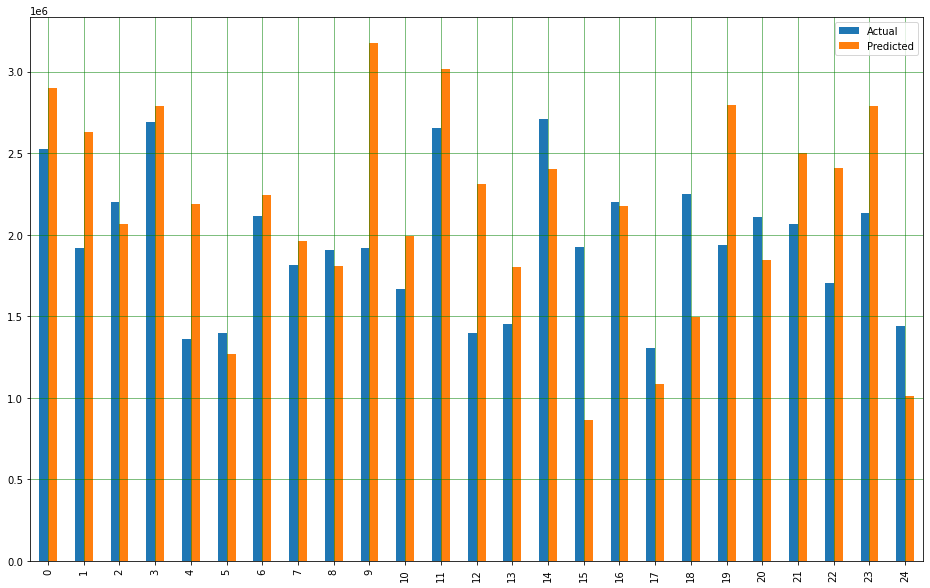

In [61]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 608599.8692292306
Mean Squared Error: 999782542362.1125
Root Mean Squared Error: 999891.2652694355
r2 score: 0.15106046955937702


### Predicting based on year and month only

In [63]:
dataMonths = data.groupby(['Year','Month']).sum()
dataMonths.reset_index(inplace=True)
dataMonths.head()

,Year,Month,Transaction Count,Day,date_ordinal
0,2016,1,57459389,130,22815349
1,2016,2,49421759,113,21344261
2,2016,3,48888646,121,22817209
3,2016,4,45633160,123,22082085
4,2016,5,49598833,122,22819100


In [64]:
X = dataMonths[['Year','Month']].values
y = dataMonths['Transaction Count'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,66665511,83640592.24
1,78995069,86867455.18
2,196540987,90094318.11
3,82327103,62821254.39
4,69307021,66048117.32
5,71021347,69274980.26
6,73156062,72501843.19
7,80415785,75728706.13
8,82494010,78955569.06


### Plotting Actual v/s Predicted across all years ('Year' and 'Month')

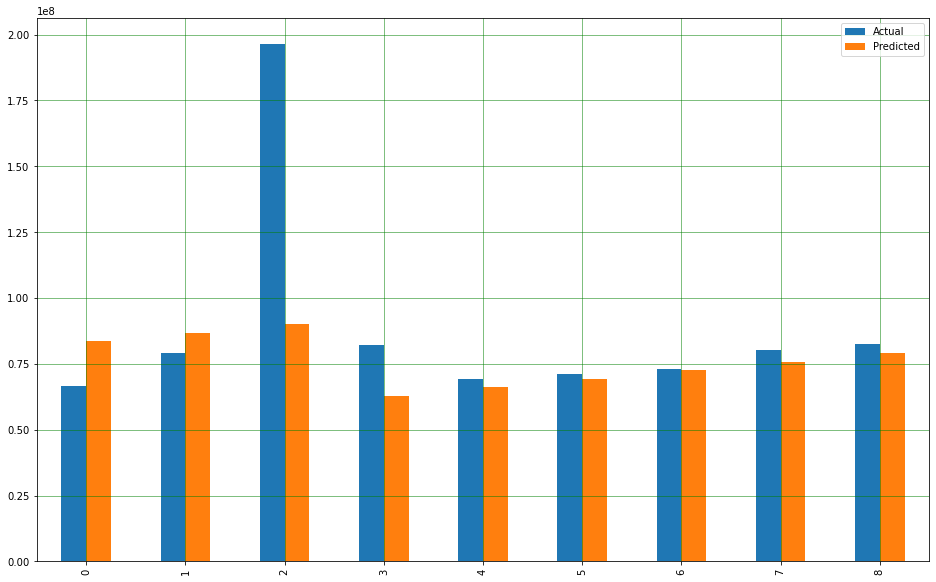

In [66]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 18298332.661722183
Mean Squared Error: 1345565202185943.2
Root Mean Squared Error: 36681946.543033175
r2 score: 0.08854962275256573


### Dropping December month from the data

In [68]:
dataMonthsNoDec = dataMonths[dataMonths['Month'] < 12]

In [69]:
dataMonthsNoDec.tail()

,Year,Month,Transaction Count,Day,date_ordinal
37,2019,2,69307021,112,20638926
38,2019,3,71021347,130,22851154
39,2019,4,73156062,115,22114935
40,2019,5,80415785,124,22853045
41,2019,6,82494010,125,22116765


In [70]:
X = dataMonthsNoDec[['Year','Month']].values
y = dataMonthsNoDec['Transaction Count'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,66665511,66140544.17
1,78995069,66152860.37
2,82327103,75249231.04
3,69307021,75261547.24
4,71021347,75273863.44
5,73156062,75286179.64
6,80415785,75298495.84
7,82494010,75310812.03


### Plotting Actual v/s Predicted across all years ('Year' and 'Month') excluding December

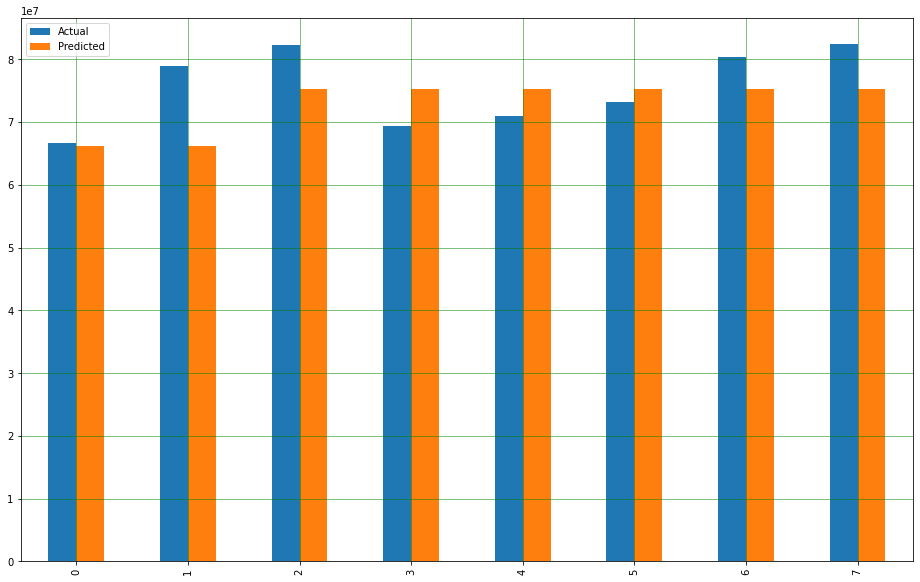

In [72]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 5635336.858816147
Mean Squared Error: 43894605698088.234
Root Mean Squared Error: 6625300.423232763
r2 score: -0.2823370910096574


## Creating new dataset using 1-k encoding

In [131]:
df = data
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Day'] = df['Day'].astype(str)
df_dummy = pd.get_dummies(df)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1277 non-null   datetime64[ns]
 1   Transaction Count  1277 non-null   int64         
 2   date_ordinal       1277 non-null   int64         
 3   Day_1              1277 non-null   uint8         
 4   Day_2              1277 non-null   uint8         
 5   Day_3              1277 non-null   uint8         
 6   Day_4              1277 non-null   uint8         
 7   Day_5              1277 non-null   uint8         
 8   Day_6              1277 non-null   uint8         
 9   Day_7              1277 non-null   uint8         
 10  Year_2016          1277 non-null   uint8         
 11  Year_2017          1277 non-null   uint8         
 12  Year_2018          1277 non-null   uint8         
 13  Year_2019          1277 non-null   uint8         
 14  Month_1 

C:\Users\18abh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\18abh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18abh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Linear Regression using 1-K encoded data

In [132]:
X = df_dummy[['date_ordinal','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7',
              'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6',
              'Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']].values
y = df_dummy['Transaction Count'].values

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

pd.options.display.float_format = '{:.2f}'.format

y_pred = model.predict(X_test)

df_output = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_output

,Actual,Predicted
0,1805023,2258230.17
1,2146586,2453876.46
2,2278689,1970299.81
3,2164705,1938656.04
4,2265698,2302404.67
...,...,...
251,1503428,1724166.15
252,1411686,1723722.89
253,1714066,1553382.83
254,2190886,2170500.49


### Plotting Actual v/s Predicted across all years (1-K encoding)

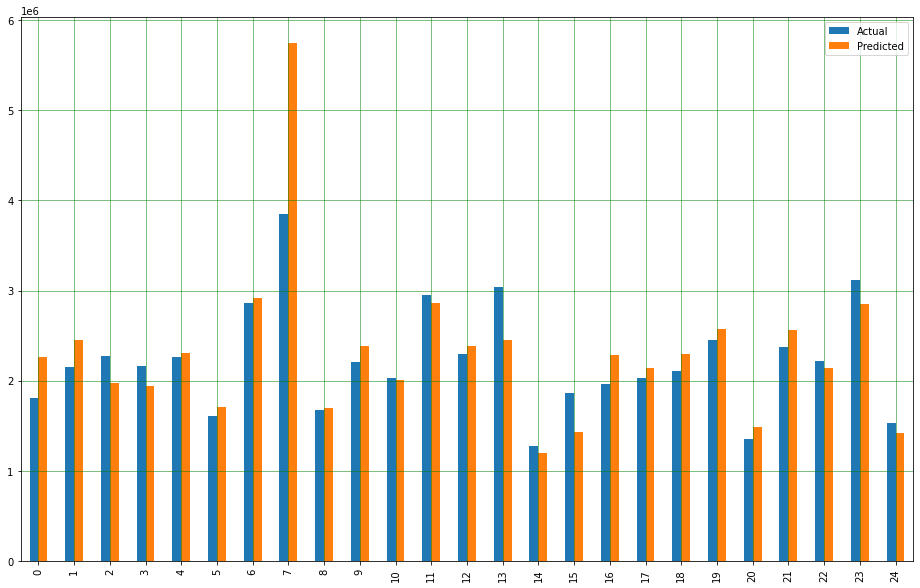

In [134]:
df1 = df_output.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [135]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' ,r2_score(y_test, y_pred))

Mean Absolute Error: 283687.87754122727
Mean Squared Error: 306070797853.7631
Root Mean Squared Error: 553236.6562817065
r2 score: 0.44857765381531833


### Creating data for prediction

In [136]:
LinearTest = pd.date_range(start = '07-09-2019', end='09-06-2020')

In [137]:
df_test = pd.DataFrame()
df_test['Date'] = list(LinearTest)
df_test['date_ordinal'] = pd.Series(LinearTest).apply(lambda x: x.toordinal())
df_test['Day'] = data['Day']
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test

,Date,date_ordinal,Day,Month,Year
0,2019-07-09,737249,5,7,2019
1,2019-07-10,737250,6,7,2019
2,2019-07-11,737251,7,7,2019
3,2019-07-12,737252,1,7,2019
4,2019-07-13,737253,2,7,2019
...,...,...,...,...,...
421,2020-09-02,737670,6,9,2020
422,2020-09-03,737671,7,9,2020
423,2020-09-04,737672,1,9,2020
424,2020-09-05,737673,2,9,2020


In [138]:
df_test['Year'] = df_test['Year'].astype(str)
df_test['Month'] = df_test['Month'].astype(str)
df_test['Day'] = df_test['Day'].astype(str)
df_test_dummy = pd.get_dummies(df_test)
df_test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          426 non-null    datetime64[ns]
 1   date_ordinal  426 non-null    int64         
 2   Day_1         426 non-null    uint8         
 3   Day_2         426 non-null    uint8         
 4   Day_3         426 non-null    uint8         
 5   Day_4         426 non-null    uint8         
 6   Day_5         426 non-null    uint8         
 7   Day_6         426 non-null    uint8         
 8   Day_7         426 non-null    uint8         
 9   Month_1       426 non-null    uint8         
 10  Month_10      426 non-null    uint8         
 11  Month_11      426 non-null    uint8         
 12  Month_12      426 non-null    uint8         
 13  Month_2       426 non-null    uint8         
 14  Month_3       426 non-null    uint8         
 15  Month_4       426 non-null    uint8     

In [141]:
df_X_test = df_test_dummy[['date_ordinal','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7',
              'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6',
              'Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']].values

df_y_pred = model.predict(df_X_test)

linear_predicted = list(df_y_pred)

In [142]:
dates = []
form = "%d-%m-%Y %H:%M"
for i in LinearTest:
    dates.append(i.strftime(form))

pred = []
for i in linear_predicted:
    pred.append(int(round(i)))

linear_output = pd.DataFrame()
linear_output['Date'] = dates
linear_output['Transaction Count'] = pred

linear_output.to_csv('LinearRegressionPredictedData.csv')

# ARIMA

## ARIMA Model - Training and Testing (within Sample)

In [92]:
def parser(x):
    return datetime.datetime.strptime(x, '%d-%m-%Y %H:%M')

In [93]:
series = pd.read_csv('TrafficData.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2310461.168080, expected=2346103.000000
predicted=2262738.686248, expected=2031331.000000
predicted=1989465.677440, expected=2210877.000000
predicted=2280481.448805, expected=2499836.000000
predicted=2454328.005946, expected=2311642.000000
predicted=2230341.855465, expected=2228269.000000
predicted=2284914.224131, expected=2491629.000000
predicted=2489502.879073, expected=2461533.000000
predicted=2366907.541394, expected=2180928.000000
predicted=2194222.882118, expected=2237715.000000
predicted=2313806.645446, expected=2389290.000000
predicted=2366710.152084, expected=2766590.000000
predicted=2749402.954326, expected=2548424.000000
predicted=2461493.749597, expected=3005452.000000
predicted=3016512.279286, expected=3524873.000000
predicted=3375305.041563, expected=2701437.000000
predicted=2460657.687176, expected=1907993.000000
predicted=2079638.616145, expected=2050061.000000
predicted=2253196.419848, expected=2062328.000000
predicted=2085358.862462, expected=2369911.000000


predicted=2049151.368330, expected=1947968.000000
predicted=1953078.038667, expected=2269944.000000
predicted=2324271.172377, expected=2190886.000000
predicted=2171215.517587, expected=2415690.000000
predicted=2408812.300368, expected=2426897.000000
predicted=2343015.943459, expected=1912097.000000
predicted=1836935.167673, expected=2066120.000000
predicted=2209058.080849, expected=2120636.000000
predicted=2094193.242091, expected=2054756.000000
predicted=2064915.374819, expected=2061972.000000
predicted=2143142.328385, expected=2512882.000000
predicted=2492440.742579, expected=2412159.000000
predicted=2276833.505674, expected=1997508.000000
predicted=1986063.281344, expected=1955604.000000
predicted=2046726.015129, expected=2029738.000000
predicted=2023492.198547, expected=2103731.000000
predicted=2138863.483397, expected=2151355.000000
predicted=2191607.328932, expected=2325914.000000
predicted=2305985.345468, expected=2482278.000000
predicted=2409846.657168, expected=1802401.000000


predicted=2194648.700638, expected=2468536.000000
predicted=2443132.128444, expected=2499369.000000
predicted=2435349.663799, expected=2024515.000000
predicted=2009925.228435, expected=2155407.000000
predicted=2209293.871165, expected=2117926.000000
predicted=2097816.009209, expected=2157121.000000
predicted=2182790.632757, expected=2257010.000000
predicted=2290233.087117, expected=2627222.000000
predicted=2571577.504829, expected=2635827.000000
predicted=2559105.362025, expected=2146097.000000
predicted=2130083.561694, expected=2227783.000000
predicted=2275404.974206, expected=2158386.000000
predicted=2147568.420523, expected=2138636.000000
predicted=2181784.623669, expected=2221080.000000
predicted=2274711.107118, expected=2603772.000000
predicted=2563550.199671, expected=2508555.000000
predicted=2444995.425700, expected=2033685.000000
predicted=2043029.127012, expected=2196559.000000
predicted=2246531.416660, expected=2151842.000000
predicted=2129198.969856, expected=2198283.000000


Test MSE: 386921034227.418


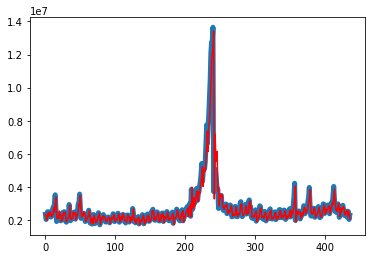

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1283
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18745.919
Method:                       css-mle   S.D. of innovations         536060.560
Date:                Sun, 06 Sep 2020   AIC                          37505.838
Time:                        20:03:32   BIC                          37541.936
Sample:                             1   HQIC                         37519.391
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.3375   9682.044     -0.005      0.996    -1.9e+04    1.89e+04
ar.L1.D.y     -0.0665      0.028     -2.398      0.017      -0.121      -0.012
ar.L2.D.y     -0.1933      0.028     -6.982      0.0

In [94]:
error = metrics.mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, linewidth=5)
plt.plot(predictions, color='red')
plt.show()
print(model_fit.summary())

In [95]:
print(r2_score(test, predictions))

0.78878628702461


## ARIMA Model for out of sample - single step

In [96]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load dataset
series = pd.read_csv('TrafficData.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# seasonal difference
X = series.values
print(X)
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

[2093576 2397260 2173039 ... 2510980 2032842 2291760]
Forecast: 2308093.632046


## ARIMA Model - Future Forecast

### Calculating number of days to be predicted

In [97]:
start = datetime.date(2019, 7, 9)
end = datetime.date(2020, 9, 6)
delta = end-start
print(delta.days+1)

426


### Forecasting Traffic Data from 09-07-2019 till Present

In [98]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

series = pd.read_csv('TrafficData.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=426)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
predicted = list()
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    predicted.append(int(round(inverted)))
    day += 1

Day 1: 2308093.632046
Day 2: 2273682.844181
Day 3: 2532713.829980
Day 4: 2653558.746245
Day 5: 2709401.284590
Day 6: 2354772.862596
Day 7: 2139846.684040
Day 8: 2371123.526187
Day 9: 2437696.887932
Day 10: 2383738.070220
Day 11: 2603318.876353
Day 12: 2637895.208844
Day 13: 2525526.182457
Day 14: 2433068.310601
Day 15: 2224285.726429
Day 16: 2206839.286903
Day 17: 2393484.754751
Day 18: 2475965.896669
Day 19: 2514916.243432
Day 20: 2501598.845183
Day 21: 2205966.989173
Day 22: 2319724.709711
Day 23: 2507485.539680
Day 24: 2461620.356925
Day 25: 2424196.447368
Day 26: 2722782.132903
Day 27: 2592131.492035
Day 28: 2272365.167417
Day 29: 2292652.862712
Day 30: 2380011.320772
Day 31: 2440144.719590
Day 32: 2487125.610166
Day 33: 2760493.857412
Day 34: 2587684.790418
Day 35: 2227751.948146
Day 36: 2418571.688563
Day 37: 2605269.862023
Day 38: 2392068.475157
Day 39: 2655338.091353
Day 40: 2698724.128514
Day 41: 2605703.603971
Day 42: 2277281.477854
Day 43: 2255296.142153
Day 44: 2179831.7704

### Creating Output Dataset

In [99]:
FinalTest = pd.date_range(start = '07-09-2019', end='09-06-2020')

In [100]:
print(FinalTest)

DatetimeIndex(['2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
               '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16',
               '2019-07-17', '2019-07-18',
               ...
               '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
               '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06'],
              dtype='datetime64[ns]', length=426, freq='D')


In [101]:
dates = []
form = "%d-%m-%Y %H:%M"
for i in FinalTest:
    dates.append(i.strftime(form))

In [102]:
output = pd.DataFrame()
output['Date'] = dates
output['Transaction Count'] = predicted

In [103]:
output.to_csv('ARIMAPredictedTrafficData.csv')

### Graph for Upcoming Traffic Projection - ARIMA

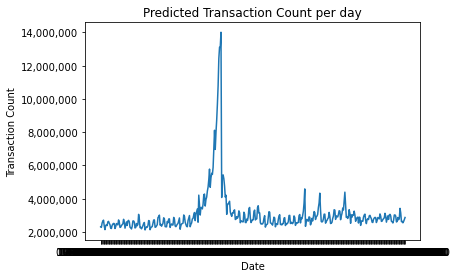

In [104]:
plt.plot(output['Date'], output['Transaction Count'])
plt.title('Predicted Transaction Count per day')
plt.ylabel('Transaction Count')
plt.xlabel('Date')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Visualization with Input and Predicted data - ARIMA

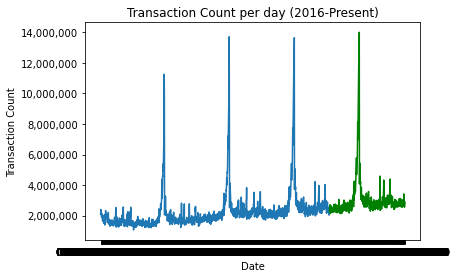

In [105]:
inputdata = pd.read_csv('TrafficData.csv')
plt.plot(inputdata['Date'], inputdata['Transaction Count'])
plt.plot(output['Date'], output['Transaction Count'], color='g')
plt.title('Transaction Count per day (2016-Present)')
plt.ylabel('Transaction Count')
plt.xlabel('Date')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()